### Run a ParAMSJob for Lennard-Jones

ParAMS uses PLAMS to run jobs through Python. PLAMS offers many functions for handling jobs. To run jobs through PLAMS, you can either

* use the ``$AMSBIN/plams`` program
* use the ``$AMSBIN/amspython`` program. You must then call ``init()`` before running jobs.

Here, we use the second approach.

In [1]:
# first import all plams and params functions and classes
from scm.plams import *
from scm.params import *
import os

# call PLAMS init() to set up a new directory for running jobs
# set path=None to use the current working directory
# the default folder name is 'plams_workdir'
init(path='/tmp', folder='demo_paramsjob') 

PLAMS working folder: /tmp/demo_paramsjob


Below it is shown how to set up and run a ParAMS job using a ``params.in`` file taken from the Getting Started tutorial. The job should take less than 2 minutes to finish.

In [2]:
# load all the settings for the job from a "params.in" file
params_in_file = os.path.expandvars('$AMSHOME/scripting/scm/params/examples/LJ_Ar/params.in')
job = ParAMSJob.from_inputfile(params_in_file)

# set a name for the job
job.name = "LJ_Ar"

# run the job
job.run();

[22.03|13:45:53] JOB LJ_Ar STARTED
[22.03|13:45:54] JOB LJ_Ar RUNNING
[22.03|13:46:17] JOB LJ_Ar FINISHED
[22.03|13:46:17] JOB LJ_Ar SUCCESSFUL


To find out where the job and its results are stored:

In [3]:
print(f"The job was run in: {job.path}")
print(f"Contents of the job directory: {os.listdir(job.path)}")
print(f"The results are stored in: {job.results.path}")
print(f"Contents of the results directory: {os.listdir(job.results.path)}")

The job was run in: /tmp/demo_paramsjob/LJ_Ar
Contents of the job directory: ['LJ_Ar.out', 'LJ_Ar.run', 'LJ_Ar.dill', 'results', 'LJ_Ar.in', 'LJ_Ar.err']
The results are stored in: /tmp/demo_paramsjob/LJ_Ar/results
Contents of the results directory: ['settings_and_initial_data', 'optimization']


### Access the results

When a job has finished, you would like to access the results. The job may have been run via the GUI or with the ParAMSJob as above. Typically, you would write **another** Python script and load the finished (or running) job:

In [4]:
#job = ParAMSJob.load_external(results_dir) 

#in this example it would be

#job = ParAMSJob.load_external('/tmp/demo_paramsjob/LJ_Ar/results')

In this tutorial, there is no need to explicitly load the job again with ``load_external`` since the job was run in the same script, so the lines above are commented out.

The results can be accessed with ``job.results``, which is of type ``ParAMSResults``.

Below we print a table with the initial and best Lennard-Jones parameters eps and sigma, and the corresponding loss function values.

In [5]:
# compare the results
initial_interface = job.results.get_parameter_interface(source='initial')
initial_loss = job.results.get_loss(source='initial')
best_interface = job.results.get_parameter_interface(source='best')
best_loss = job.results.get_loss(source='best')

print("{:12s} {:>12s} {:>12s} {:>12s}".format("", "eps", "rmin", "loss"))
print("{:12s} {:12.7f} {:12.5f} {:12.5f}".format("Initial", 
                                                 initial_interface['eps'].value, 
                                                 initial_interface['rmin'].value, 
                                                 initial_loss))
print("{:12s} {:12.7f} {:12.5f} {:12.5f}".format("Best", 
                                                 best_interface['eps'].value, 
                                                 best_interface['rmin'].value, 
                                                 best_loss))

                      eps         rmin         loss
Initial         0.0003000      4.00000    572.18867
Best            0.0001961      3.65375      0.00251


Let's also plot the running loss function value vs. evaluation number:

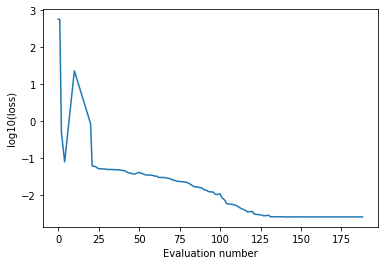

In [6]:
import matplotlib.pyplot as plt
import numpy as np

evaluation, loss = job.results.get_running_loss()
plt.plot(evaluation, np.log10(loss), '-')
plt.ylabel("log10(loss)")
plt.xlabel("Evaluation number");

To see the parameter values at different evaluations:

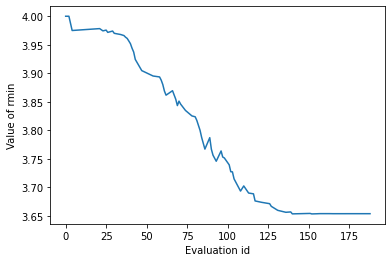

In [7]:
evaluation, parameters = job.results.get_running_active_parameters()
plt.plot(evaluation, parameters['rmin'])
plt.xlabel("Evaluation id")
plt.ylabel("Value of rmin");

You can plot a scatter plot of reference vs. predicted forces with the help of the ``get_data_set_evaluator()`` function, which returns a ``DataSetEvaluator``:

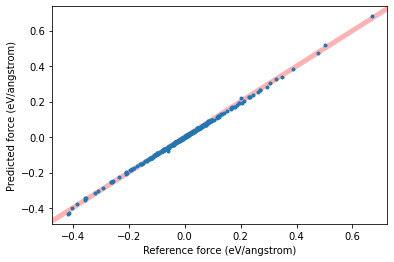

In [8]:
dse = job.results.get_data_set_evaluator()
forces = dse.results['forces']
plt.plot(forces.reference_values, forces.predictions, '.')
plt.xlabel(f"Reference force ({forces.unit})")
plt.ylabel(f"Predicted force ({forces.unit})");
plt.xlim(auto=True)
plt.autoscale(False)
plt.plot([-10,10],[-10,10], linewidth=5, zorder=-1, alpha = 0.3, c='red')
plt.show()

### Call PLAMS finish()

If you used PLAMS to run jobs, the ``finish()`` function [should be called at the end](../../../plams/started.html#running-plams), if ``init()`` was called at the beginning.

In [9]:
finish()

[22.03|13:46:17] PLAMS run finished. Goodbye
